# Telecom Churn Case Study
## Problem Statement
### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Importing Libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

### Data Exploration

In [3]:
tele = pd.read_csv("telecom_churn_data.csv")

In [4]:
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
tele.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
tele.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
tele.shape

(99999, 226)

In [8]:
col_date= tele.select_dtypes(include=['object'])
for i in col_date.columns:
    tele[i] = pd.to_datetime(tele[i])
tele.shape

(99999, 226)

### Filter High value Customers

In [9]:
tele['good_phase']=(tele['total_rech_amt_6'] + tele['total_rech_amt_7'])/2

In [10]:
X=tele['good_phase'].quantile(0.7)
X

368.5

In [11]:
tele=tele[tele['good_phase'] >= X]
tele.shape

(30011, 227)

#### Analysis: As mentioned the total number of rows are now come upto 30K

## Data Cleaning

### Missing Value Imputation

In [12]:
col_missing = (round(100*(tele.isnull().sum()/len(tele.index)), 2).to_frame('null')).sort_values('null',ascending=False)
col_missing

,null
arpu_3g_6,62.02
count_rech_3g_6,62.02
fb_user_6,62.02
arpu_2g_6,62.02
night_pck_user_6,62.02
date_of_last_rech_data_6,62.02
total_rech_data_6,62.02
max_rech_data_6,62.02
av_rech_amt_data_6,62.02
count_rech_2g_6,62.02


In [13]:
# Deleting the columns which are having more than 50% of missing values

In [14]:
col_missing_50 = list(col_missing.index[col_missing['null']>50])
col_missing_50

['arpu_3g_6',
 'count_rech_3g_6',
 'fb_user_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'count_rech_2g_6',
 'fb_user_9',
 'night_pck_user_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'arpu_2g_9',
 'count_rech_3g_9',
 'arpu_3g_9',
 'av_rech_amt_data_9',
 'count_rech_3g_7',
 'arpu_2g_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'av_rech_amt_data_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'arpu_3g_8',
 'total_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [15]:
tele=tele.drop(col_missing_50, axis=1)
tele.shape

(30011, 187)

In [16]:
tele.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 187 columns):
 #    Column                Dtype         
---   ------                -----         
 0    mobile_number         int64         
 1    circle_id             int64         
 2    loc_og_t2o_mou        float64       
 3    std_og_t2o_mou        float64       
 4    loc_ic_t2o_mou        float64       
 5    last_date_of_month_6  datetime64[ns]
 6    last_date_of_month_7  datetime64[ns]
 7    last_date_of_month_8  datetime64[ns]
 8    last_date_of_month_9  datetime64[ns]
 9    arpu_6                float64       
 10   arpu_7                float64       
 11   arpu_8                float64       
 12   arpu_9                float64       
 13   onnet_mou_6           float64       
 14   onnet_mou_7           float64       
 15   onnet_mou_8           float64       
 16   onnet_mou_9           float64       
 17   offnet_mou_6          float64       
 18   offnet_mou_7          fl

In [17]:
round(100*(tele.isnull().sum()/len(tele.index)), 2).sort_values(ascending=False)

std_og_mou_9            5.68
std_og_t2m_mou_9        5.68
loc_og_t2c_mou_9        5.68
loc_og_t2m_mou_9        5.68
std_ic_t2m_mou_9        5.68
std_ic_t2o_mou_9        5.68
std_ic_t2t_mou_9        5.68
loc_og_t2t_mou_9        5.68
std_ic_mou_9            5.68
loc_og_mou_9            5.68
roam_og_mou_9           5.68
roam_ic_mou_9           5.68
std_og_t2t_mou_9        5.68
loc_ic_t2t_mou_9        5.68
spl_og_mou_9            5.68
og_others_9             5.68
offnet_mou_9            5.68
isd_ic_mou_9            5.68
std_ic_t2f_mou_9        5.68
ic_others_9             5.68
isd_og_mou_9            5.68
loc_ic_t2f_mou_9        5.68
std_og_t2c_mou_9        5.68
onnet_mou_9             5.68
loc_og_t2f_mou_9        5.68
loc_ic_mou_9            5.68
std_og_t2f_mou_9        5.68
loc_ic_t2m_mou_9        5.68
spl_ic_mou_9            5.68
std_og_t2t_mou_8        3.13
std_ic_t2o_mou_8        3.13
loc_ic_mou_8            3.13
std_og_t2c_mou_8        3.13
loc_og_mou_8            3.13
std_og_t2f_mou

#### Deleting the columns for which the unique value is 1 to overcome variance

In [18]:
for i in tele.columns:
    unique_categories = tele[i].value_counts().shape[0]
    print('{} has {} unique values'.format(i, unique_categories))

mobile_number has 30011 unique values
circle_id has 1 unique values
loc_og_t2o_mou has 1 unique values
std_og_t2o_mou has 1 unique values
loc_ic_t2o_mou has 1 unique values
last_date_of_month_6 has 1 unique values
last_date_of_month_7 has 1 unique values
last_date_of_month_8 has 1 unique values
last_date_of_month_9 has 1 unique values
arpu_6 has 29261 unique values
arpu_7 has 29260 unique values
arpu_8 has 28405 unique values
arpu_9 has 27327 unique values
onnet_mou_6 has 18813 unique values
onnet_mou_7 has 18938 unique values
onnet_mou_8 has 17604 unique values
onnet_mou_9 has 16674 unique values
offnet_mou_6 has 22454 unique values
offnet_mou_7 has 22650 unique values
offnet_mou_8 has 21513 unique values
offnet_mou_9 has 20452 unique values
roam_ic_mou_6 has 4338 unique values
roam_ic_mou_7 has 3649 unique values
roam_ic_mou_8 has 3655 unique values
roam_ic_mou_9 has 3370 unique values
roam_og_mou_6 has 5174 unique values
roam_og_mou_7 has 4431 unique values
roam_og_mou_8 has 4382 un

In [19]:
col_unique=[]
for i in tele.columns:
    if tele[i].value_counts().shape[0] ==1:
        col_unique.append(i)

col_unique
    

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [20]:
tele=tele.drop(col_unique, axis=1)
tele.shape

(30011, 171)

In [21]:
col_missing = round(100*(tele.isnull().sum()/len(tele.index)), 2).to_frame('null').sort_values('null',ascending=False)
col_missing
col_missing_0 = list(col_missing.index[col_missing['null']>0])
len(col_missing_0)

112

#### If mintues of usage column is having missing values, we can impute that there is no usage of call and hence  is updated to zero.

In [22]:
col_missing_mou=[i for i in col_missing_0 if '_mou_' in i]

In [23]:
len(col_missing_mou)

100

In [24]:
tele[col_missing_mou]=tele[col_missing_mou].fillna(0)

In [25]:
col_missing = round(100*(tele.isnull().sum()/len(tele.index)), 2).to_frame('null').sort_values('null',ascending=False)
col_missing
col_missing_0 = list(col_missing.index[col_missing['null']>0])
col_missing_0

['og_others_9',
 'ic_others_9',
 'og_others_8',
 'ic_others_8',
 'date_of_last_rech_9',
 'date_of_last_rech_8',
 'og_others_6',
 'ic_others_6',
 'ic_others_7',
 'og_others_7',
 'date_of_last_rech_7',
 'date_of_last_rech_6']

In [26]:
tele[col_missing_0]=tele[col_missing_0].fillna(0)

In [27]:
col_missing = round(100*(tele.isnull().sum()/len(tele.index)), 2).to_frame('null').sort_values('null',ascending=False)
col_missing
col_missing_0 = list(col_missing.index[col_missing['null']>0])
len(col_missing_0)

0

In [28]:
col_date=[i for i in tele.columns.to_list() if 'date' in i]
len(col_date)

4

In [29]:
tele=tele.drop(col_date, axis=1)
tele.shape

(30011, 167)

### Tag Churn Prediction

In [30]:
tele['churn']=np.where((tele['total_ic_mou_9']==0) & (tele['total_og_mou_9']==0) & (tele['vol_2g_mb_9']==0) & (tele['vol_3g_mb_9']==0),1,0)

In [31]:
tele['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

#### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [32]:
col_churn=[i for i in tele.columns if '_9' in i]
col_churn

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [33]:
tele.shape

(30011, 168)

In [34]:
tele=tele.drop(col_churn, axis=1)
tele.shape

(30011, 128)

In [35]:
tele=tele.drop('good_phase', axis=1)
tele.shape

(30011, 127)

In [36]:
tele.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,31

## EDA

### Univariate Analysis 
### Checking Churn variable

In [37]:
print(tele.churn.value_counts())
tele.churn.value_counts(normalize = True).reset_index()

0    27418
1    2593 
Name: churn, dtype: int64


,index,churn
0,0,0.913598
1,1,0.086402


Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Churn)')

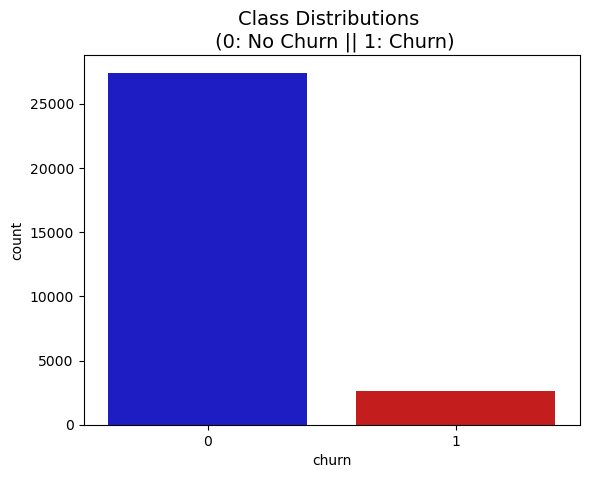

In [38]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('churn', data=tele, palette=colors)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)

#### Analysis: there is differetly class imbalance and it has to be handled

### Checking age of the network wrt to churn. We will convert days to months to analyse the same

In [39]:
tele['aon_month']=(tele['aon']/30).round(0)

In [40]:
bin_manual = [0, 6, 9, 12, 24, 60, 61]
labs = ['<6 months', '6-9 months','9-12 months','1-2 yrs','2-5 yrs','>5 yrs']

In [41]:
tele['age_bin'] = pd.cut(tele.aon_month, bins=bin_manual, labels=labs)
tele[['age_bin','aon_month']].head()

,age_bin,aon_month
7,2-5 yrs,27.0
8,9-12 months,10.0
13,NaN,87.0
16,1-2 yrs,17.0
17,1-2 yrs,22.0


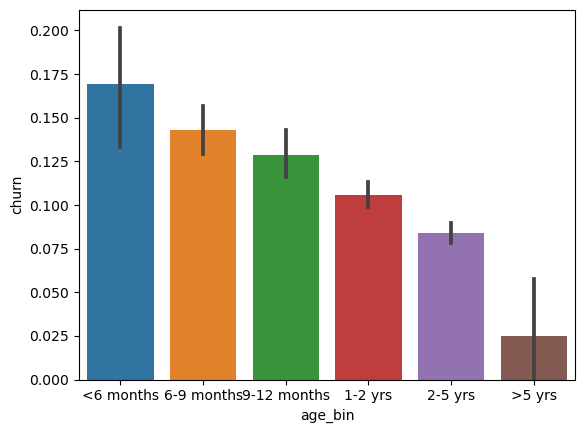

In [42]:
sns.barplot(x='age_bin',y='churn',data=tele)
plt.show()

#### Analysis: As per the graph above, the churn rate increases with respect to the new customers. Once the user is using the network for long duration, are pretty happy.

### Bivariate analysis

In [43]:
def bi_boxplot(dt,categorical,continuous):
    plt.figure(figsize = [10,6])
    
    Q1 = tele[continuous].quantile(0.25)
    Q3 = tele[continuous].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    print("Min value before which outlier exist: {}".format(Min_value))
    print("Max value after which outlier exist: {}".format(Max_value))
    
    pltname = f"{categorical} v/s {continuous} - with handling outliers"
    plt.title(pltname)
    sns.boxplot(data=dt, x=categorical, y=dt[dt[continuous] <= Max_value][continuous], color='green')
    plt.xticks(rotation = 45)

    plt.tight_layout(pad = 4)
    plt.show()

Min value before which outlier exist: -145.48050000000006
Max value after which outlier exist: 1213.5635000000002


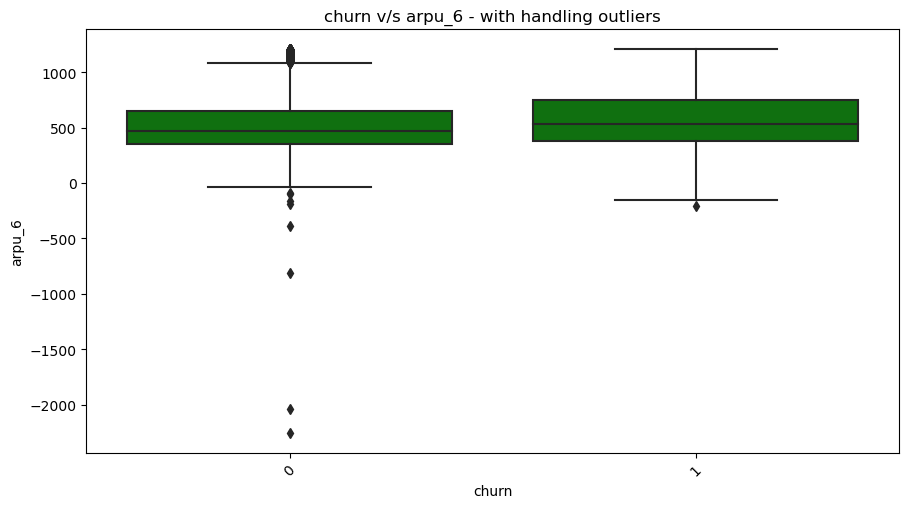

In [44]:
#arpu_6 vs churn

bi_boxplot(dt=tele,categorical='churn',continuous='arpu_6')

Min value before which outlier exist: -195.0
Max value after which outlier exist: 325.0


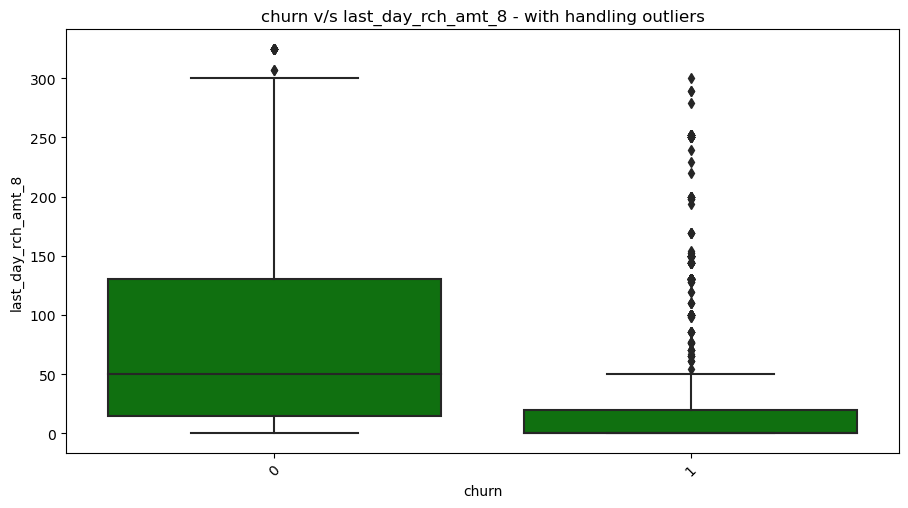

In [45]:
#last_day_rch_amt_8 vs churn

bi_boxplot(dt=tele,categorical='churn',continuous='last_day_rch_amt_8')

The median last day recharge amount for month 8, during the action phase, is almost zero, indicating that churned customers did not recharge at the end of this month. Consequently, it's apparent that their purchasing activity significantly decreases in month 8, which precedes their churn in month 9.

Min value before which outlier exist: -379.07750000000004
Max value after which outlier exist: 703.8225


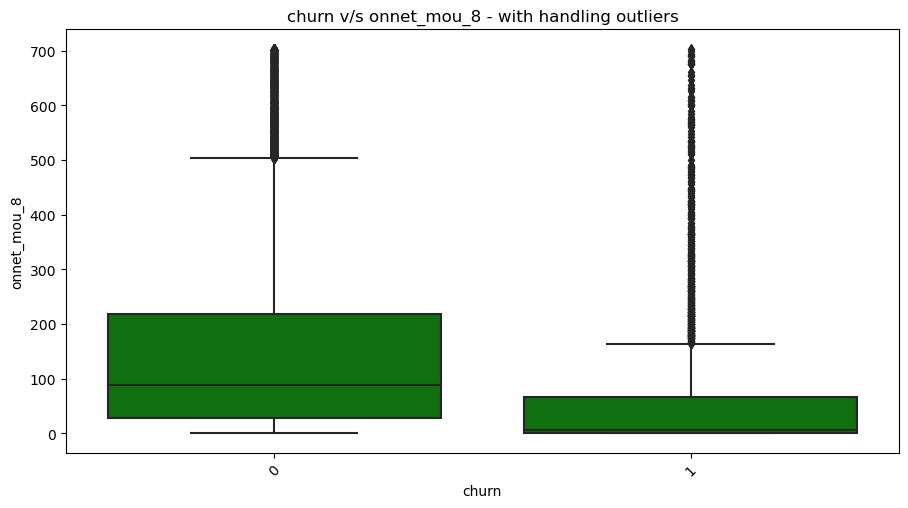

In [46]:
#onnet_mou_8 vs churn

bi_boxplot(dt=tele,categorical='churn',continuous='onnet_mou_8')

The median on-network minutes of usage for month 8, which corresponds to the action phase, is significantly lower for churned customers when compared to non-churned customers. This observation strongly indicates a decreasing pattern in their network usage leading up to their churn.

### Deleting the dervied  columns

In [47]:
tele=tele.drop('age_bin', axis=1)
tele.shape

(30011, 128)

In [48]:
tele=tele.drop('aon_month', axis=1)
tele.shape

(30011, 127)

In [49]:
tele.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,31

### Correlation Analysis

In [51]:
tele.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
mobile_number,1.000000,0.014114,0.009008,0.018085,-0.010772,-0.013823,-0.009466,0.001612,-0.007911,0.002887,0.007482,-0.003537,0.001682,-0.000647,-0.004968,-0.007281,0.042982,0.041525,0.041179,0.076031,0.072273,0.077474,0.052105,0.052740,0.055087,-0.018836,-0.019829,-0.014847,0.079948,0.076877,0.079052,-0.037290,-0.040032,-0.033275,-0.045534,-0.048767,-0.041467,0.027090,0.017889,0.020602,-0.055677,-0.060016,-0.049795,-0.004458,-0.003528,-0.004974,-0.026751,-0.029038,-0.021718,-0.016400,-0.000703,0.000701,-0.006254,-0.014884,-0.003538,0.027979,0.025138,0.027328,0.062944,0.058957,0.061430,0.052638,0.052070,0.051862,0.066575,0.062510,0.064664,-0.007750,-0.003129,-0.007353,-0.020658,-0.021685,-0.020706,0.014964,0.010616,0.013060,-0.017090,-0.015696,-0.017368,0.053602,0.049080,0.049767,-0.021272,-0.002866,-0.034164,0.011149,0.007521,0.004861,0.013486,0.012037,0.012915,-0.046411,-0.057582,-0.049460,0.013528,0.013119,0.016200,0.057833,0.054210,0.057652,0.044674,0.051417,0.043435,-0.007692,-0.013800,-0.012161,-0.013192,-0.003234,0.000428,0.014540,0.015730,0.013825,-0.018465,-0.016693,-0.011615,0.002837,0.002978,0.014741,-0.005937,-0.006469,-0.007831,0.315073,-0.024077,-0.020006,-0.031117,-0.007777,-0.039318
arpu_6,0.014114,1.000000,0.631581,0.570936,0.291288,0.142431,0.116476,0.459309,0.257895,0.209238,0.109162,0.069882,0.077812,0.176963,0.122399,0.107916,0.129194,0.086589,0.085121,0.276915,0.175359,0.154181,0.112236,0.082610,0.071729,0.045273,0.009153,0.004787,0.269509,0.174449,0.157259,0.234329,0.100276,0.074959,0.262791,0.121425,0.085729,0.051461,0.037400,0.026049,0.338514,0.151553,0.108352,0.481277,0.432633,0.425466,0.113180,0.050398,0.023539,0.086704,0.023286,0.014705,0.502950,0.267321,0.210000,0.066606,0.039024,0.040441,0.151346,0.104704,0.085222,0.041512,0.025531,0.024688,0.147276,0.097532,0.084259,0.074004,0.043102,0.040377,0.077415,0.041312,0.038892,0.024695,0.022107,0.015204,0.100740,0.056812,0.051990,0.188549,0.119397,0.104696,0.011835,-0.028108,-0.014938,0.114075,0.058845,0.058879,0.014150,0.023799,0.009025,0.330964,0.101415,0.086661,0.941256,0.608101,0.565462,0.313721,0.230572,0.257768,0.239042,0.168345,0.172094,0.030598,-0.001677,0.002541,0.216

In [52]:
corr_matrix1 = tele.corr().abs()
up_value = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
col_high_corr = [i for i in up_value.columns if any(up_value[i] > 0.90)]

In [53]:
col_high_corr

['isd_og_mou_7',
 'isd_og_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [54]:
tele=tele.drop(col_high_corr, axis=1)
tele.shape

(30011, 122)

## Handling Class Imbalance

In [55]:
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
y = tele.churn
X = tele.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [56]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    19192
1    1815 
Name: churn, dtype: int64


,index,churn
0,0,0.9136
1,1,0.0864


In [57]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    8226
1    778 
Name: churn, dtype: int64


,index,churn
0,0,0.913594
1,1,0.086406


In [58]:
col_scale = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
len(col_scale)

121

### Standardlization

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
scaler = MinMaxScaler()

# Perform fit and transform on the X_train dataset
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

# Perform only transform on the X_test dataset
X_test[col_scale] = scaler.transform(X_test[col_scale])

### Logistic Regression

In [60]:
# Logistic Regression
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [61]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

In [62]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9204797867614394
F1 score:  0.22678185745140392
Recall:  0.13496143958868895
Precision:  0.7094594594594594

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      8226
           1       0.71      0.13      0.23       778

    accuracy                           0.92      9004
   macro avg       0.82      0.56      0.59      9004
weighted avg       0.91      0.92      0.89      9004


 confussion matrix:
 [[8183   43]
 [ 673  105]]


In [63]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3630

In [64]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [65]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.8005330964015993
F1 score:  0.4149837133550489
Recall:  0.8187660668380463
Precision:  0.2779232111692845

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8226
           1       0.28      0.82      0.41       778

    accuracy                           0.80      9004
   macro avg       0.63      0.81      0.65      9004
weighted avg       0.92      0.80      0.84      9004


 confussion matrix:
 [[6571 1655]
 [ 141  637]]


In [66]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

20712

In [67]:
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [68]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.9191470457574411
F1 score:  0.2320675105485232
Recall:  0.14138817480719795
Precision:  0.6470588235294118

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      8226
           1       0.65      0.14      0.23       778

    accuracy                           0.92      9004
   macro avg       0.79      0.57      0.59      9004
weighted avg       0.90      0.92      0.89      9004


 confussion matrix:
 [[8166   60]
 [ 668  110]]


In [69]:
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

38384

In [70]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [71]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.8150821856952466
F1 score:  0.43730990199391684
Recall:  0.8316195372750642
Precision:  0.29665291150848233

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8226
           1       0.30      0.83      0.44       778

    accuracy                           0.82      9004
   macro avg       0.64      0.82      0.66      9004
weighted avg       0.92      0.82      0.85      9004


 confussion matrix:
 [[6692 1534]
 [ 131  647]]


In [72]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38384

In [73]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [74]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8252998667258996
F1 score:  0.44748858447488593
Recall:  0.8187660668380463
Precision:  0.3078782020299662

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8226
           1       0.31      0.82      0.45       778

    accuracy                           0.83      9004
   macro avg       0.64      0.82      0.67      9004
weighted avg       0.92      0.83      0.86      9004


 confussion matrix:
 [[6794 1432]
 [ 141  637]]


In [75]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

38466

In [76]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [77]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.8076410484229232
F1 score:  0.4313854235062377
Recall:  0.8444730077120822
Precision:  0.2896825396825397

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8226
           1       0.29      0.84      0.43       778

    accuracy                           0.81      9004
   macro avg       0.64      0.82      0.66      9004
weighted avg       0.92      0.81      0.85      9004


 confussion matrix:
 [[6615 1611]
 [ 121  657]]


In [78]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [79]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.8254109284762328
F1 score:  0.4476458186929024
Recall:  0.8187660668380463
Precision:  0.30802707930367507

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8226
           1       0.31      0.82      0.45       778

    accuracy                           0.83      9004
   macro avg       0.64      0.82      0.67      9004
weighted avg       0.92      0.83      0.86      9004


 confussion matrix:
 [[6795 1431]
 [ 141  637]]


### Decision Trees

In [80]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [81]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9079298089737894
F1 score:  0.4743183259353202
Recall:  0.480719794344473
Precision:  0.46808510638297873

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      8226
           1       0.47      0.48      0.47       778

    accuracy                           0.91      9004
   macro avg       0.71      0.71      0.71      9004
weighted avg       0.91      0.91      0.91      9004


 confussion matrix:
 [[7801  425]
 [ 404  374]]


In [82]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [83]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.7793203020879609
F1 score:  0.3773111877154497
Recall:  0.7737789203084833
Precision:  0.24948197264815583

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87      8226
           1       0.25      0.77      0.38       778

    accuracy                           0.78      9004
   macro avg       0.61      0.78      0.62      9004
weighted avg       0.91      0.78      0.82      9004


 confussion matrix:
 [[6415 1811]
 [ 176  602]]


In [84]:
# Decision Trees - Tomek Links
from sklearn.tree import DecisionTreeClassifier
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [85]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))

Accuracy:  0.9088183029764549
F1 score:  0.49226963512677796
Recall:  0.5115681233933161
Precision:  0.47437425506555425

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      8226
           1       0.47      0.51      0.49       778

    accuracy                           0.91      9004
   macro avg       0.71      0.73      0.72      9004
weighted avg       0.91      0.91      0.91      9004


 confussion matrix:
 [[7785  441]
 [ 380  398]]


In [86]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [87]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9111505997334518
F1 score:  0.48119325551232167
Recall:  0.4768637532133676
Precision:  0.4856020942408377

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      8226
           1       0.49      0.48      0.48       778

    accuracy                           0.91      9004
   macro avg       0.72      0.71      0.72      9004
weighted avg       0.91      0.91      0.91      9004


 confussion matrix:
 [[7833  393]
 [ 407  371]]


In [88]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [89]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.8756108396268325
F1 score:  0.44389275074478657
Recall:  0.5745501285347043
Precision:  0.3616504854368932

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      8226
           1       0.36      0.57      0.44       778

    accuracy                           0.88      9004
   macro avg       0.66      0.74      0.69      9004
weighted avg       0.91      0.88      0.89      9004


 confussion matrix:
 [[7437  789]
 [ 331  447]]


In [90]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [91]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.8723900488671702
F1 score:  0.4408759124087591
Recall:  0.5822622107969152
Precision:  0.3547376664056382

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      8226
           1       0.35      0.58      0.44       778

    accuracy                           0.87      9004
   macro avg       0.66      0.74      0.68      9004
weighted avg       0.91      0.87      0.89      9004


 confussion matrix:
 [[7402  824]
 [ 325  453]]


In [92]:
# Decision Trees - SMOTE+TOMEK
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [93]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  0.8754997778764994
F1 score:  0.4436724565756824
Recall:  0.5745501285347043
Precision:  0.36135812449474536

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      8226
           1       0.36      0.57      0.44       778

    accuracy                           0.88      9004
   macro avg       0.66      0.74      0.69      9004
weighted avg       0.91      0.88      0.89      9004


 confussion matrix:
 [[7436  790]
 [ 331  447]]


### Random Forest

In [94]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [95]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9399155930697468
F1 score:  0.586707410236822
Recall:  0.493573264781491
Precision:  0.7231638418079096

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.72      0.49      0.59       778

    accuracy                           0.94      9004
   macro avg       0.84      0.74      0.78      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8079  147]
 [ 394  384]]


In [96]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [97]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.8892714349178144
F1 score:  0.5515069725596041
Recall:  0.787917737789203
Precision:  0.42422145328719724

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      8226
           1       0.42      0.79      0.55       778

    accuracy                           0.89      9004
   macro avg       0.70      0.84      0.74      9004
weighted avg       0.93      0.89      0.90      9004


 confussion matrix:
 [[7394  832]
 [ 165  613]]


In [98]:
# Random Forest - Tomek Links
rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [99]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.9405819635717458
F1 score:  0.5937737281700836
Recall:  0.5025706940874036
Precision:  0.725417439703154

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.73      0.50      0.59       778

    accuracy                           0.94      9004
   macro avg       0.84      0.74      0.78      9004
weighted avg       0.93      0.94      0.94      9004


 confussion matrix:
 [[8078  148]
 [ 387  391]]


In [100]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [101]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9396934695690804
F1 score:  0.6033601168736304
Recall:  0.5308483290488432
Precision:  0.6988155668358714

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8226
           1       0.70      0.53      0.60       778

    accuracy                           0.94      9004
   macro avg       0.83      0.75      0.79      9004
weighted avg       0.93      0.94      0.94      9004


 confussion matrix:
 [[8048  178]
 [ 365  413]]


In [102]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [103]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9253665037760995
F1 score:  0.6093023255813953
Recall:  0.6735218508997429
Precision:  0.5562632696390658

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8226
           1       0.56      0.67      0.61       778

    accuracy                           0.93      9004
   macro avg       0.76      0.81      0.78      9004
weighted avg       0.93      0.93      0.93      9004


 confussion matrix:
 [[7808  418]
 [ 254  524]]


In [104]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [105]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9233673922701022
F1 score:  0.6029919447640967
Recall:  0.6735218508997429
Precision:  0.5458333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8226
           1       0.55      0.67      0.60       778

    accuracy                           0.92      9004
   macro avg       0.76      0.81      0.78      9004
weighted avg       0.93      0.92      0.93      9004


 confussion matrix:
 [[7790  436]
 [ 254  524]]


In [106]:
# Random Forest - SMOTE+TOMEK
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [107]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.923811639271435
F1 score:  0.6043829296424452
Recall:  0.6735218508997429
Precision:  0.5481171548117155

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8226
           1       0.55      0.67      0.60       778

    accuracy                           0.92      9004
   macro avg       0.76      0.81      0.78      9004
weighted avg       0.93      0.92      0.93      9004


 confussion matrix:
 [[7794  432]
 [ 254  524]]


### Summary of the Class Imbalance

### 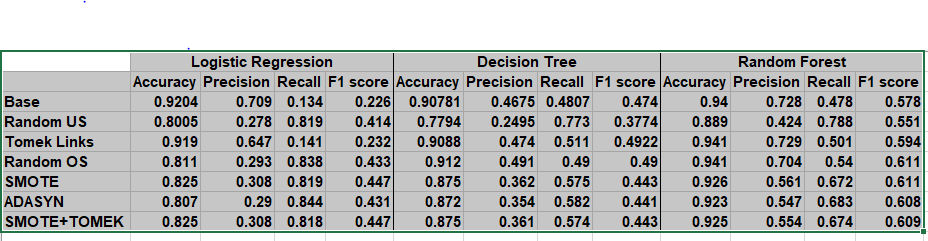


#### Analysis: For the SMOTE, the Accuracy, Precision, Recall and F1 score are equally High for Logistic Regression and Random Forest. We will build Logistic model on the SMOTE resampling using RFE and manual elimination.

### Modelling
#### Model 1 : Logistic Regression

In [108]:
import statsmodels.api as sm

In [109]:
logm1 = sm.GLM(y_resampled_smt, (sm.add_constant(X_resampled_smt)),  family=sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38262
Model Family:                Binomial   Df Model:                          121
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13213.
Date:                Tue, 03 Oct 2023   Deviance:                       26426.
Time:                        19:38:32   Pearson chi2:                 9.38e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5023
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6811      0.196      3.483      0.000       0.298       1.064
mobile_number          0.0058      0.057      0.102      0.918      -0.105       0.117
arpu_6                 4.7511      1.690      2.811      0.005       1.438       8.064
arpu_7                 2.4239      2.112      1.148      0.251      -1.716       6.563
arpu_8                 9.4835      2.240      4.233      0.000       5.093      13.874
onnet_mou_6          -63.3695     25.015     -2.533      0.011    -112.398     -14.341
onnet_mou_7          -42.0996     23.905     -1.761      0.078     -88.952       4.753
onnet_mou_8           57.1617     27.414      2.085      0.037       3.430     110.893
offnet_mou_6         -53.2589     22.516     -2.365      0.018     -97.389      -9.129
offnet_mou_7         -26.9875     23.697     -1.139      0.255     -73.433      19.458
offnet_mou_8          40.1424     34.905      1.150      0.250     -28.271     108.555
roam_ic_mou_6          1.2767      0.832      1.535      0.125      -0.353       2.907
roam_ic_mou_7          2.6464      1.533      1.727      0.084      -0.358       5.650
roam_ic_mou_8         -0.1243      1.064     -0.117      0.907      -2.210       1.962
roam_og_mou_6         29.9708     12.727      2.355      0.019       5.027      54.915
roam_og_mou_7         13.6535      8.112      1.683      0.092      -2.246      29.553
roam_og_mou_8        -17.6743     13.453     -1.314      0.189     -44.042       8.694
loc_og_t2t_mou_6    4.634e+04   2.01e+04      2.303      0.021    6905.011    8.58e+04
loc_og_t2t_mou_7    2434.6927   2.23e+04      0.109      0.913   -4.13e+04    4.61e+04
loc_og_t2t_mou_8    4.265e+05    3.5e+04     12.179      0.000    3.58e+05    4.95e+05
loc_og_t2m_mou_6    3.383e+04   1.47e+04      2.303      0.021    5035.162    6.26e+04
loc_og_t2m_mou_7    1537.8368   1.42e+04      0.108      0.914   -2.63e+04    2.93e+04
loc_og_t2m_mou_8    1.968e+05   1.62e+04     12.181      0.000    1.65e+05    2.28e+05
loc_og_t2f_mou_6    1.056e+04   4586.427      2.303      0.021    1573.576    1.96e+04
loc_og_t2f_mou_7     395.7030   3724.230      0.106      0.915   -6903.654    7695.060
loc_og_t2f_mou_8    2.334e+04   1915.963     12.182      0.000    1.96e+04    2.71e+04
loc_og_t2c_mou_6      -3.4093      1.296     -2.631      0.009      -5.949      -0.869
loc_og_t2c_mou_7       7.1560      1.745      4.101      0.000       3.736      10.576
loc_og_t2c_mou_8      -1.3132      1.252     -1.049      0.294      -3.766       1.140
loc_og_mou_6       -1.301e+05   4.08e+04     -3.187      0.001    -2.1e+05   -5.01e+04
loc_og_mou_7       -2564.8394   2.33e+04     -0.110      0.912   -4.82e+04    4.31e+04
loc_og_mou_8       -4.379e+05    3.6e+04    -12.180      0.000   -5.08e+05   -3.67e+05
std_og_t2t_mou_6    1.289e+05   2.72e+

#### using RFE we will selector the best estimators

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
# Selection of 20 features by RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)
# features selected by RFE
list(zip(X_resampled_smt.columns, rfe.support_, rfe.ranking_))

[('mobile_number', False, 99),
 ('arpu_6', True, 1),
 ('arpu_7', False, 3),
 ('arpu_8', False, 5),
 ('onnet_mou_6', False, 75),
 ('onnet_mou_7', False, 59),
 ('onnet_mou_8', False, 8),
 ('offnet_mou_6', False, 98),
 ('offnet_mou_7', False, 33),
 ('offnet_mou_8', False, 7),
 ('roam_ic_mou_6', False, 53),
 ('roam_ic_mou_7', False, 10),
 ('roam_ic_mou_8', False, 43),
 ('roam_og_mou_6', False, 88),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 6),
 ('loc_og_t2t_mou_6', False, 94),
 ('loc_og_t2t_mou_7', False, 60),
 ('loc_og_t2t_mou_8', False, 11),
 ('loc_og_t2m_mou_6', False, 28),
 ('loc_og_t2m_mou_7', False, 85),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 90),
 ('loc_og_t2f_mou_7', False, 57),
 ('loc_og_t2f_mou_8', False, 21),
 ('loc_og_t2c_mou_6', False, 31),
 ('loc_og_t2c_mou_7', False, 32),
 ('loc_og_t2c_mou_8', False, 71),
 ('loc_og_mou_6', False, 72),
 ('loc_og_mou_7', False, 80),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 87),
 ('std_og_t2t_m

In [111]:
# Get only the columns selected by RFE
col_rfe = X_resampled_smt.columns[ rfe.support_ ]

In [112]:
col_rfe

Index(['arpu_6', 'roam_og_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sep_vbc_3g'],
      dtype='object')

#### Creating second Model- Model 2 with the RFE estimators

In [113]:
X_train_sm = sm.add_constant(X_resampled_smt[col_rfe])

# Second model
logm2 = sm.GLM(y_resampled_smt, X_train_sm, family = sm.families.Binomial())

# Fitting the model
res = logm2.fit()

# Checking the summary of model statistics
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38363
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14612.
Date:                Tue, 03 Oct 2023   Deviance:                       29225.
Time:                        19:40:07   Pearson chi2:                 3.09e+10
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4647
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0105      0.129      0.081      0.935      -0.243       0.264
arpu_6                10.1972      0.942     10.829      0.000       8.351      12.043
roam_og_mou_7          7.5540      0.438     17.255      0.000       6.696       8.412
loc_og_t2m_mou_8       2.9170      1.855      1.572      0.116      -0.719       6.553
loc_og_mou_8         -25.3276      5.568     -4.549      0.000     -36.240     -14.415
std_og_mou_7           7.2209      0.353     20.427      0.000       6.528       7.914
std_og_mou_8         -10.5587      5.951     -1.774      0.076     -22.223       1.105
total_og_mou_8        -9.4374      5.948     -1.587      0.113     -21.095       2.220
loc_ic_t2m_mou_7      12.3255      1.268      9.717      0.000       9.839      14.812
loc_ic_t2m_mou_8     -29.6893      3.449     -8.609      0.000     -36.449     -22.930
loc_ic_mou_8          -6.6591      2.445     -2.724      0.006     -11.451      -1.867
total_ic_mou_7         9.0347      1.159      7.796      0.000       6.763      11.306
total_ic_mou_8       -20.2201      1.614    -12.528      0.000     -23.383     -17.057
spl_ic_mou_8         -21.8120      1.497    -14.567      0.000     -24.747     -18.877
total_rech_num_6       2.5524      0.663      3.848      0.000       1.252       3.852
total_rech_num_8      -8.0359      0.429    -18.741      0.000      -8.876      -7.195
last_day_rch_amt_8   -16.7791      0.785    -21.381      0.000     -18.317     -15.241
monthly_2g_8          -7.8214      0.382    -20.478      0.000      -8.570      -7.073
sachet_2g_8           -9.5546      0.713    -13.404      0.000     -10.952      -8.158
monthly_3g_8         -15.9917      0.899    -17.797      0.000     -17.753     -14.231
sep_vbc_3g          -209.3547     21.247     -9.853      0.000    -250.998    -167.711
======================================================================================
"""

In [114]:
# import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Create a dataframe that contains the names of all the feature variables and their corresponding VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[col_rfe].values, i) for i in range(X_resampled_smt[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
6,total_og_mou_8,377.19
5,std_og_mou_8,230.11
3,loc_og_mou_8,85.57
9,loc_ic_mou_8,11.60
11,total_ic_mou_8,11.32
8,loc_ic_t2m_mou_8,9.59
10,total_ic_mou_7,8.27
7,loc_ic_t2m_mou_7,7.24
0,arpu_6,5.40
2,loc_og_t2m_mou_8,4.54


#### For the First 5 variables, the VIF is high and for total_og_mou_8, the p-value is High. Hence deleting those variables and chekcing the model again.

In [116]:
col_rfe = col_rfe.drop('total_og_mou_8', 1)
col_rfe = col_rfe.drop('std_og_mou_8', 1)
col_rfe = col_rfe.drop('loc_og_mou_8', 1)
col_rfe = col_rfe.drop('loc_ic_mou_8', 1)
col_rfe = col_rfe.drop('total_ic_mou_8', 1)
len(col_rfe)

15

### Model3

In [117]:
X_train_sm = sm.add_constant(X_resampled_smt[col_rfe])
logm3 = sm.GLM(y_resampled_smt, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38368
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15367.
Date:                Tue, 03 Oct 2023   Deviance:                       30735.
Time:                        19:40:15   Pearson chi2:                 1.90e+11
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4432
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5047      0.118      4.277      0.000       0.273       0.736
arpu_6                 7.1771      0.865      8.298      0.000       5.482       8.872
roam_og_mou_7          8.4420      0.424     19.932      0.000       7.612       9.272
loc_og_t2m_mou_8     -14.8006      0.956    -15.480      0.000     -16.675     -12.927
std_og_mou_7           1.7165      0.202      8.503      0.000       1.321       2.112
loc_ic_t2m_mou_7      28.0582      1.044     26.866      0.000      26.011      30.105
loc_ic_t2m_mou_8     -77.0873      2.085    -36.972      0.000     -81.174     -73.001
total_ic_mou_7        -5.3369      0.633     -8.426      0.000      -6.578      -4.095
spl_ic_mou_8         -23.2337      1.480    -15.701      0.000     -26.134     -20.334
total_rech_num_6       6.7633      0.672     10.065      0.000       5.446       8.080
total_rech_num_8     -13.9459      0.398    -35.070      0.000     -14.725     -13.166
last_day_rch_amt_8   -22.9976      0.873    -26.329      0.000     -24.710     -21.286
monthly_2g_8          -7.7121      0.377    -20.435      0.000      -8.452      -6.972
sachet_2g_8           -9.0068      0.720    -12.507      0.000     -10.418      -7.595
monthly_3g_8         -14.5521      0.891    -16.335      0.000     -16.298     -12.806
sep_vbc_3g          -211.4270     21.246     -9.952      0.000    -253.068    -169.786
======================================================================================
"""

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[col_rfe].values, i) for i in range(X_resampled_smt[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,arpu_6,5.34
4,loc_ic_t2m_mou_7,5.33
8,total_rech_num_6,3.99
6,total_ic_mou_7,3.97
5,loc_ic_t2m_mou_8,3.68
9,total_rech_num_8,2.95
2,loc_og_t2m_mou_8,2.11
3,std_og_mou_7,1.77
10,last_day_rch_amt_8,1.49
12,sachet_2g_8,1.23


#### The p-value is zero for all the variables, hence we will start with the model evalution and predict on the test set.

### Random Forest tree with hypertuning 

In [135]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
model_cv = GridSearchCV(estimator=rf_smt, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [138]:

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [139]:
model_cv.best_score_

0.9420671241554078

In [140]:
model_cv_best = model_cv.best_estimator_
model_cv_best

RandomForestClassifier(max_depth=15, max_features=3, min_samples_leaf=20,
                       n_estimators=80)

#### Summary of the variable based on the model:
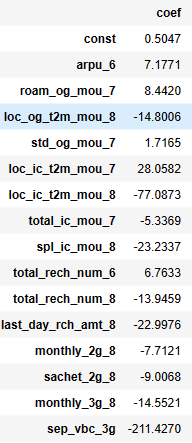

As the Model - Linear Regression shows great results, we are going to consider that model for Model evaluation.

### Model Evalution

In [120]:
y_pred_smt = res.predict(X_train_sm).values.reshape(-1)

In [121]:
y_train_pred_final = pd.DataFrame({"Converted": y_resampled_smt.values, "Conversion_Prob": y_pred_smt})

In [122]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [123]:
print ('Accuracy: ', accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('F1 score: ', f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('Recall: ', recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('Precision: ', precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy:  0.8315183409754064
F1 score:  0.836539190657938
Recall:  0.862234264276782
Precision:  0.8123312552157479

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83     19192
           1       0.81      0.86      0.84     19192

    accuracy                           0.83     38384
   macro avg       0.83      0.83      0.83     38384
weighted avg       0.83      0.83      0.83     38384


 confussion matrix:
 [[15369  3823]
 [ 2644 16548]]


In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
from sklearn import metrics

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

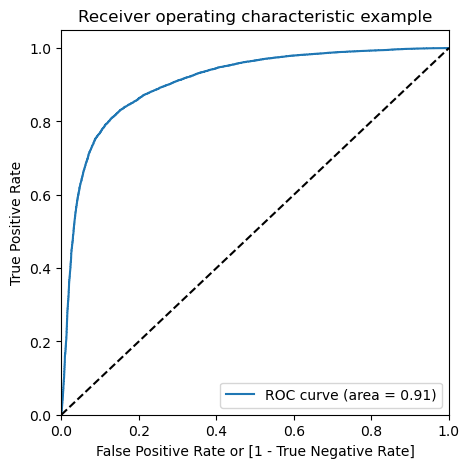

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Analysis: The ROC of the model is 91% which shows a strong performance. We will check on the test set.

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.016135,0,1,0,0,0,0,0,0,0,0,0
1,0,0.429935,0,1,1,1,1,1,0,0,0,0,0
2,0,0.323057,0,1,1,1,1,0,0,0,0,0,0
3,0,0.622677,1,1,1,1,1,1,1,1,0,0,0
4,0,0.883637,1,1,1,1,1,1,1,1,1,1,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.704252  0.975927  0.432576
0.2  0.2   0.756930  0.954408  0.559452
0.3  0.3   0.790407  0.929346  0.651469
0.4  0.4   0.814246  0.898291  0.730200
0.5  0.5   0.831518  0.862234  0.800802
0.6  0.6   0.839100  0.815236  0.862964
0.7  0.7   0.830138  0.744894  0.915381
0.8  0.8   0.781263  0.607597  0.954929
0.9  0.9   0.598765  0.210296  0.987234


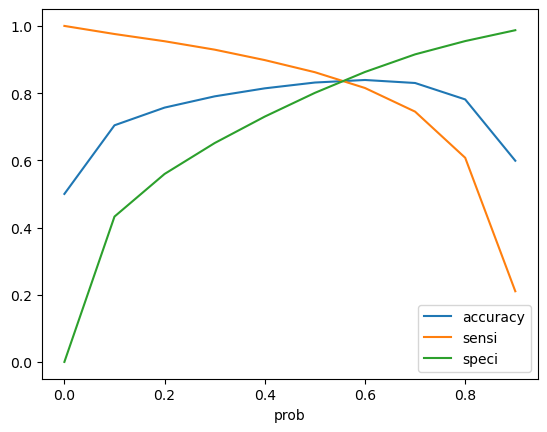

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [131]:
# Let's create columns with different probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.016135,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.429935,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.323057,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.622677,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
4,0,0.883637,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [132]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.831518  0.862234  0.800802
0.51  0.51  0.831987  0.856867  0.807107
0.52  0.52  0.833186  0.853116  0.813256
0.53  0.53  0.834697  0.848947  0.820446
0.54  0.54  0.836156  0.845248  0.827063
0.55  0.55  0.837172  0.841080  0.833264
0.56  0.56  0.837875  0.836442  0.839308
0.57  0.57  0.838995  0.832430  0.845561
0.58  0.58  0.839308  0.827689  0.850927
0.59  0.59  0.839334  0.821175  0.857493


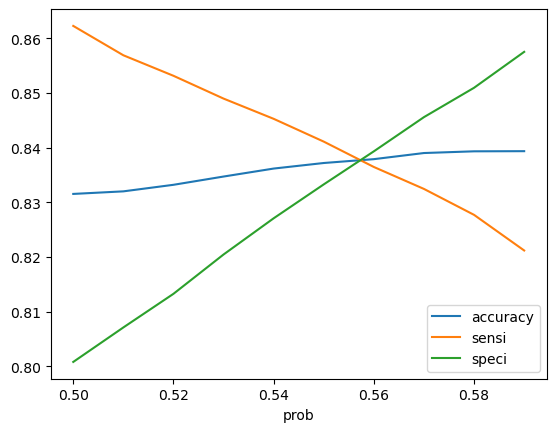

In [133]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [134]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,Final_Predicted
0,0,0.016135,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.429935,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.323057,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.622677,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
4,0,0.883637,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [135]:
print ('Accuracy: ', accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('F1 score: ', f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('Recall: ', recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('Precision: ', precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy:  0.8315183409754064
F1 score:  0.836539190657938
Recall:  0.862234264276782
Precision:  0.8123312552157479

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83     19192
           1       0.81      0.86      0.84     19192

    accuracy                           0.83     38384
   macro avg       0.83      0.83      0.83     38384
weighted avg       0.83      0.83      0.83     38384


 confussion matrix:
 [[15369  3823]
 [ 2644 16548]]


In [136]:
# Import precision_recall_curve from sklearn
from sklearn.metrics import precision_recall_curve

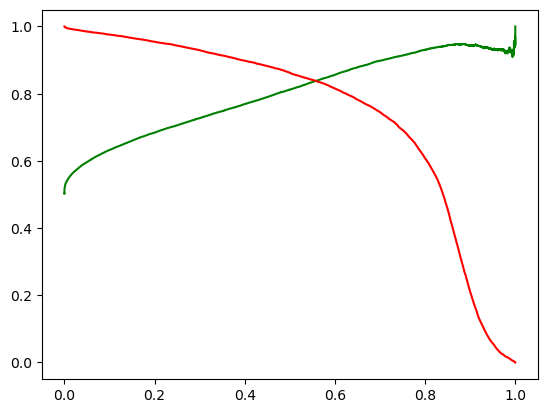

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


### Making Predictions on the test set

In [138]:
X_test = X_test[col_rfe]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.54 else 0)

In [139]:
print ('Accuracy: ', accuracy_score(y_pred_final.churn, y_pred_final.Final_Predicted))
print ('F1 score: ', f1_score(y_pred_final.churn, y_pred_final.Final_Predicted))
print ('Recall: ', recall_score(y_pred_final.churn, y_pred_final.Final_Predicted))
print ('Precision: ', precision_score(y_pred_final.churn, y_pred_final.Final_Predicted))
print ('\n clasification report:\n', classification_report(y_pred_final.churn, y_pred_final.Final_Predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_pred_final.churn, y_pred_final.Final_Predicted))

Accuracy:  0.8176366059529098
F1 score:  0.4349621472814866
Recall:  0.8123393316195373
Precision:  0.29699248120300753

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8226
           1       0.30      0.81      0.43       778

    accuracy                           0.82      9004
   macro avg       0.64      0.82      0.66      9004
weighted avg       0.92      0.82      0.85      9004


 confussion matrix:
 [[6730 1496]
 [ 146  632]]


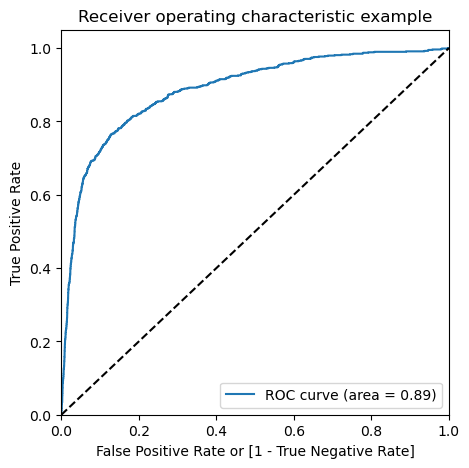

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, y_pred_final.Conversion_Prob, drop_intermediate = False )

draw_roc(y_pred_final.churn, y_pred_final.Conversion_Prob)

#### Analysis: on the test set, the ROC curve is 89% which shows a strong performance of the model.

From the above top variables we can note that few variables are having negative coefficients which means that the variables are inversely correlated with the churn probability.

### Recomendations:

1. Customers whose Average revenue on the 8th month is higher have greater chance that the customer is likely to churn.
2. Customers with roaming outgoing minutes of usage is higher for the month of August then there is a higher chance of churn.
3. Customers with local outgoing minutes of usgae is lower for the month of July then the churn rate is higher